In [1]:
!wget https://github.com/owid/energy-data/raw/master/owid-energy-data.csv -O /kaggle/working/owid-energy-data.csv


--2024-11-20 14:23:08--  https://github.com/owid/energy-data/raw/master/owid-energy-data.csv
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/owid/energy-data/master/owid-energy-data.csv [following]
--2024-11-20 14:23:08--  https://raw.githubusercontent.com/owid/energy-data/master/owid-energy-data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8424128 (8.0M) [text/plain]
Saving to: '/kaggle/working/owid-energy-data.csv'

/kaggle/working/owi 100%[===================>]   8.03M  --.-KB/s    in 0.05s   

2024-11-20 14:23:09 (170 MB/s) - '/kaggle/working/owid-energy-data.csv' saved [8424128/84241

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

# Load the dataset
file_path = '/kaggle/working/owid-energy-data.csv'  # Update the path if necessary
df = pd.read_csv(file_path)

# Filter data for Germany and European Union (27)
countries = ['Germany', 'European Union (27)']
df_filtered = df[df['country'].isin(countries)].sort_values(by=['country', 'year'])

# Display basic information
print(df_filtered.info())
print(df_filtered.head())


<class 'pandas.core.frame.DataFrame'>
Index: 248 entries, 7067 to 7958
Columns: 130 entries, country to wind_share_energy
dtypes: float64(127), int64(1), object(2)
memory usage: 253.8+ KB
None
                  country  year iso_code   population  gdp  \
7067  European Union (27)  1900      NaN  258926472.0  NaN   
7068  European Union (27)  1901      NaN  261057896.0  NaN   
7069  European Union (27)  1902      NaN  263250924.0  NaN   
7070  European Union (27)  1903      NaN  265507488.0  NaN   
7071  European Union (27)  1904      NaN  267788807.0  NaN   

      biofuel_cons_change_pct  biofuel_cons_change_twh  \
7067                      NaN                      NaN   
7068                      NaN                      NaN   
7069                      NaN                      NaN   
7070                      NaN                      NaN   
7071                      NaN                      NaN   

      biofuel_cons_per_capita  biofuel_consumption  biofuel_elec_per_capita  \
7067  

In [4]:
# Filter data for Germany
df_germany = df[df['country'] == 'Germany']
# Display summary statistics for Germany
print("\nSummary statistics for Germany:")
print(df_germany.describe())



Summary statistics for Germany:
              year    population           gdp  biofuel_cons_change_pct  \
count   124.000000  1.240000e+02  1.230000e+02                31.000000   
mean   1961.500000  7.339183e+07  1.386072e+12                34.702194   
std      35.939764  7.397431e+06  1.160506e+12                83.944528   
min    1900.000000  5.577539e+07  2.285721e+11               -12.259000   
25%    1930.750000  6.759478e+07  3.699295e+11                 0.123000   
50%    1961.500000  7.389939e+07  9.268359e+11                 6.528000   
75%    1992.250000  8.029714e+07  2.173134e+12                41.644000   
max    2023.000000  8.340856e+07  3.909613e+12               459.860000   

       biofuel_cons_change_twh  biofuel_cons_per_capita  biofuel_consumption  \
count                31.000000                32.000000            32.000000   
mean                  1.165258               248.548438            20.409938   
std                   3.372413               185.88

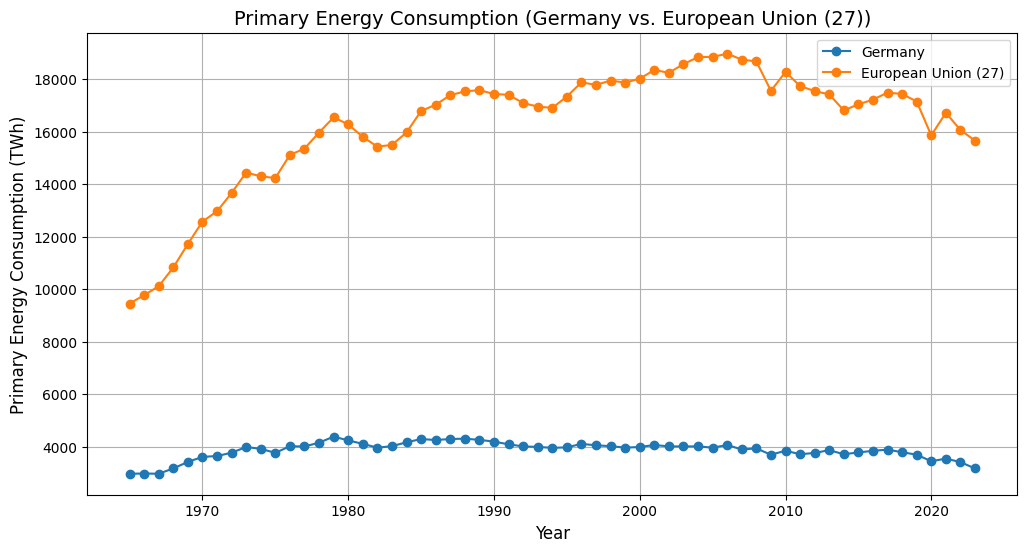

In [5]:
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df_filtered[df_filtered['country'] == country]
    plt.plot(country_data['year'], country_data['primary_energy_consumption'], marker='o', label=country)

plt.title('Primary Energy Consumption (Germany vs. European Union (27))', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Primary Energy Consumption (TWh)', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()


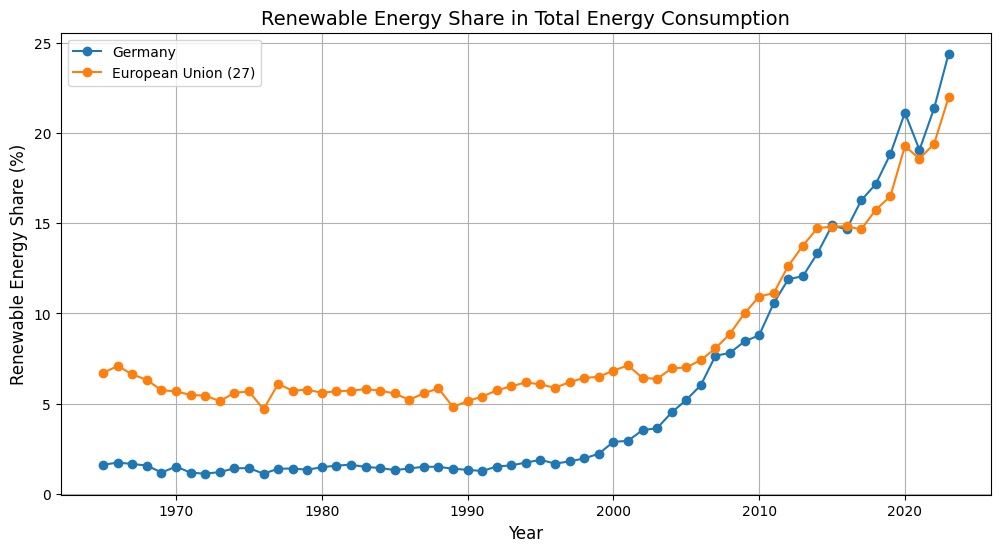

In [6]:
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df_filtered[df_filtered['country'] == country]
    plt.plot(country_data['year'], country_data['renewables_share_energy'], marker='o', label=country)

plt.title('Renewable Energy Share in Total Energy Consumption', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Renewable Energy Share (%)', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()


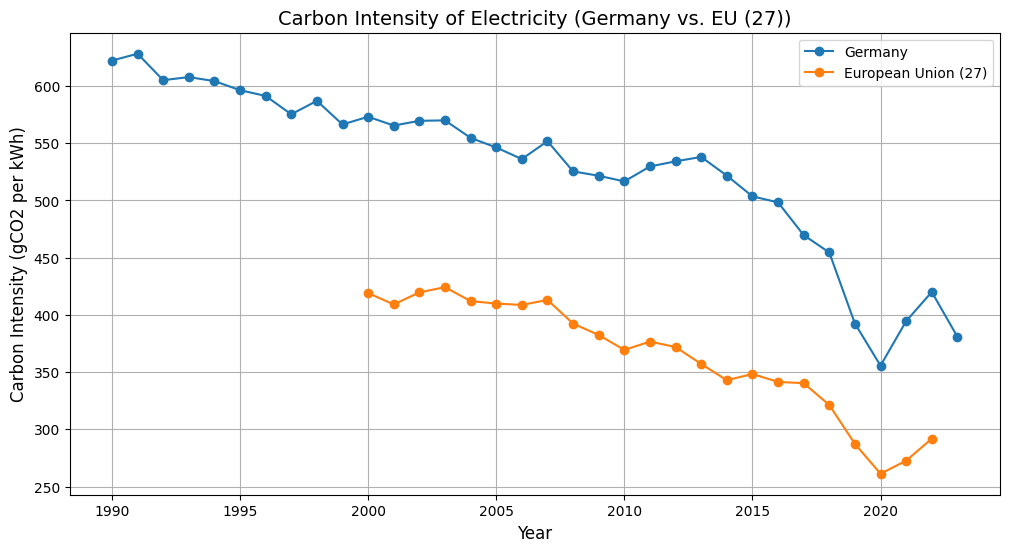

In [7]:
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df_filtered[df_filtered['country'] == country]
    plt.plot(country_data['year'], country_data['carbon_intensity_elec'], marker='o', label=country)

plt.title('Carbon Intensity of Electricity (Germany vs. EU (27))', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Carbon Intensity (gCO2 per kWh)', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()


In [16]:
df_germany = df[df['country'] == 'Germany']

# Select energy-related columns
energy_columns = [
    'year',
    'coal_consumption',
    'oil_consumption',
    'gas_consumption',
    'nuclear_consumption',
    'biofuel_consumption',
    'solar_consumption',
    'wind_consumption',
    'hydro_consumption'
]

df_germany_energy = df_germany[energy_columns]
print(df_germany_energy.head())

      year  coal_consumption  oil_consumption  gas_consumption  \
7835  1900               NaN              NaN              NaN   
7836  1901               NaN              NaN              NaN   
7837  1902               NaN              NaN              NaN   
7838  1903               NaN              NaN              NaN   
7839  1904               NaN              NaN              NaN   

      nuclear_consumption  biofuel_consumption  solar_consumption  \
7835                  NaN                  NaN                NaN   
7836                  NaN                  NaN                NaN   
7837                  NaN                  NaN                NaN   
7838                  NaN                  NaN                NaN   
7839                  NaN                  NaN                NaN   

      wind_consumption  hydro_consumption  
7835               NaN                NaN  
7836               NaN                NaN  
7837               NaN                NaN  
7838        

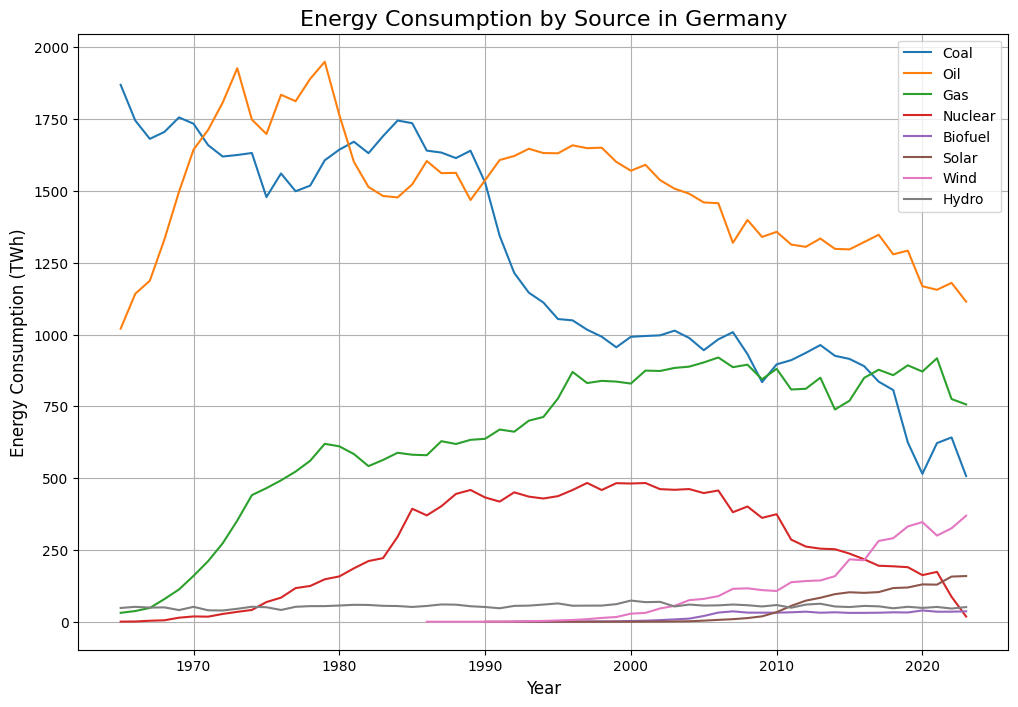

In [17]:
plt.figure(figsize=(12, 8))

# Plot each energy source
for column in energy_columns[1:]:  # Exclude 'year'
    plt.plot(df_germany_energy['year'], df_germany_energy[column], label=column.replace('_consumption', '').capitalize())

plt.title('Energy Consumption by Source in Germany', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Energy Consumption (TWh)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


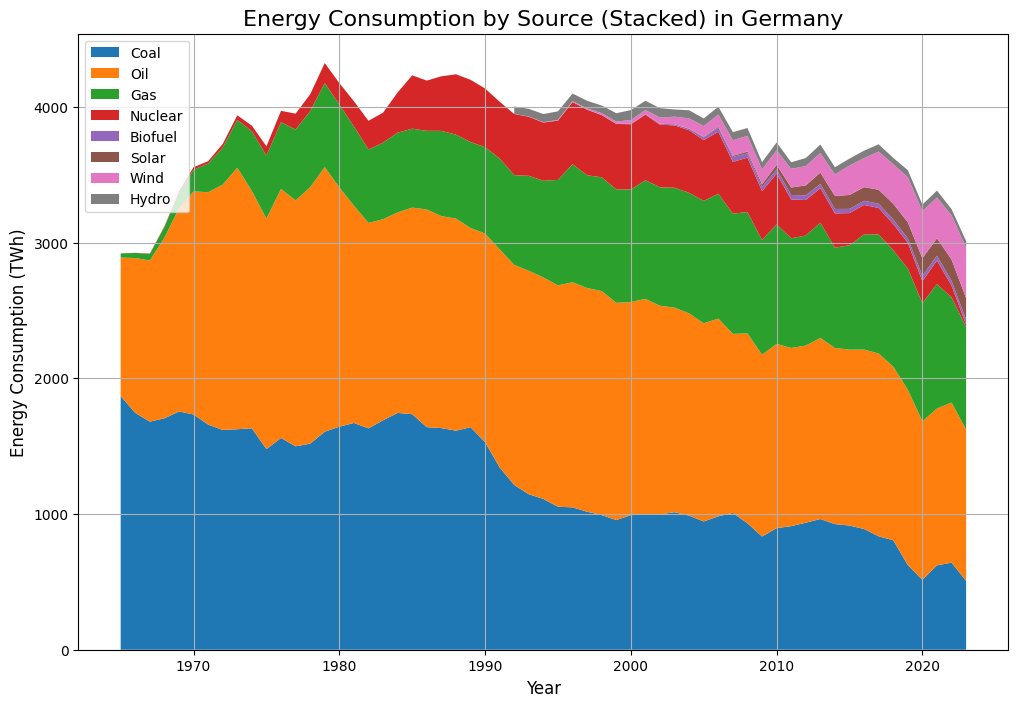

In [18]:
plt.figure(figsize=(12, 8))

# Plot a stacked area chart
plt.stackplot(
    df_germany_energy['year'],
    [df_germany_energy[column] for column in energy_columns[1:]],
    labels=[column.replace('_consumption', '').capitalize() for column in energy_columns[1:]]
)

plt.title('Energy Consumption by Source (Stacked) in Germany', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Energy Consumption (TWh)', fontsize=12)
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


/tmp/ipykernel_31/2529481258.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_germany['energy_per_gdp'] = df_germany['primary_energy_consumption'] / df_germany['gdp']


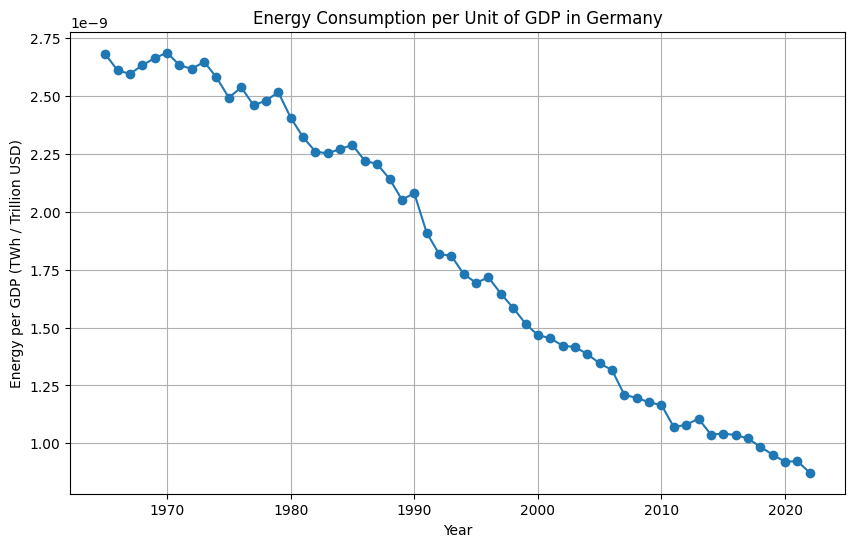

In [19]:
# Calculate energy consumption per unit of GDP
df_germany['energy_per_gdp'] = df_germany['primary_energy_consumption'] / df_germany['gdp']

# Plot the trend
plt.figure(figsize=(10, 6))
plt.plot(df_germany['year'], df_germany['energy_per_gdp'], marker='o')
plt.title('Energy Consumption per Unit of GDP in Germany')
plt.xlabel('Year')
plt.ylabel('Energy per GDP (TWh / Trillion USD)')
plt.grid(True)
plt.show()


/tmp/ipykernel_31/1809708256.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_germany['primary_energy_change'] = df_germany['primary_energy_consumption'].pct_change() * 100


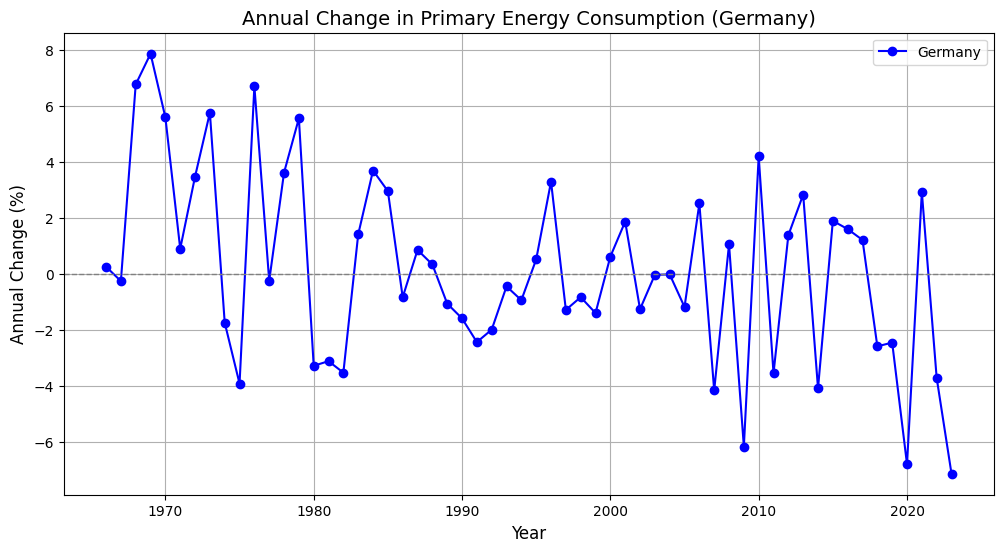

In [22]:
df_germany['primary_energy_change'] = df_germany['primary_energy_consumption'].pct_change() * 100

# Drop rows with missing values (e.g., the first year in pct_change will be NaN)
df_germany = df_germany.dropna(subset=['primary_energy_change'])

# Plot the annual percentage change
plt.figure(figsize=(12, 6))
plt.plot(df_germany['year'], df_germany['primary_energy_change'], marker='o', label='Germany', color='blue')
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)
plt.title('Annual Change in Primary Energy Consumption (Germany)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Annual Change (%)', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

/tmp/ipykernel_31/528507986.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_germany_energy['Renewable'] = df_germany_energy[['biofuel_consumption', 'solar_consumption', 'wind_consumption', 'hydro_consumption']].sum(axis=1)
/tmp/ipykernel_31/528507986.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_germany_energy['Non-renewable'] = df_germany_energy[['coal_consumption', 'oil_consumption', 'gas_consumption', 'nuclear_consumption']].sum(axis=1)


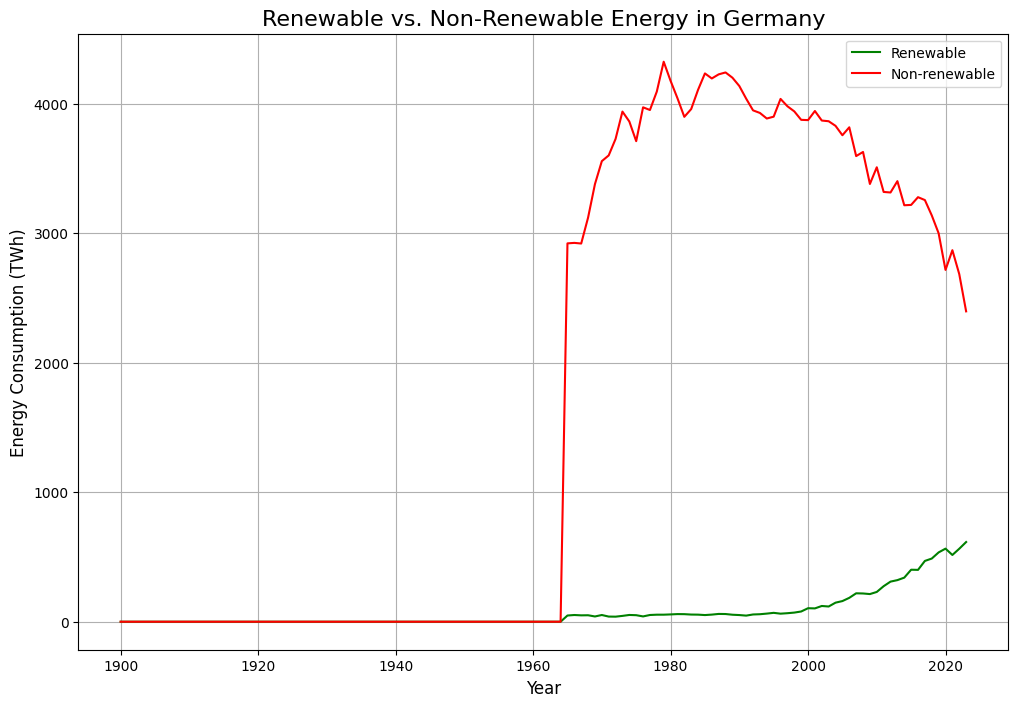

In [23]:
df_germany_energy['Renewable'] = df_germany_energy[['biofuel_consumption', 'solar_consumption', 'wind_consumption', 'hydro_consumption']].sum(axis=1)
df_germany_energy['Non-renewable'] = df_germany_energy[['coal_consumption', 'oil_consumption', 'gas_consumption', 'nuclear_consumption']].sum(axis=1)

plt.figure(figsize=(12, 8))
plt.plot(df_germany_energy['year'], df_germany_energy['Renewable'], label='Renewable', color='green')
plt.plot(df_germany_energy['year'], df_germany_energy['Non-renewable'], label='Non-renewable', color='red')
plt.title('Renewable vs. Non-Renewable Energy in Germany', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Energy Consumption (TWh)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


In [24]:
data = {
    "Source": [
        "Oil", "Solar", "Coal", "Wind", "Nuclear", "Gas", "Other renewables", "Hydropower"
    ],
    "Change (TWh)": [1337, 818, 696, 545, 120, 15, 14, -258]
}

df_change = pd.DataFrame(data)

# Sort the data for better visualization
df_change = df_change.sort_values(by="Change (TWh)", ascending=True)
print(df_change)

             Source  Change (TWh)
7        Hydropower          -258
6  Other renewables            14
5               Gas            15
4           Nuclear           120
3              Wind           545
2              Coal           696
1             Solar           818
0               Oil          1337


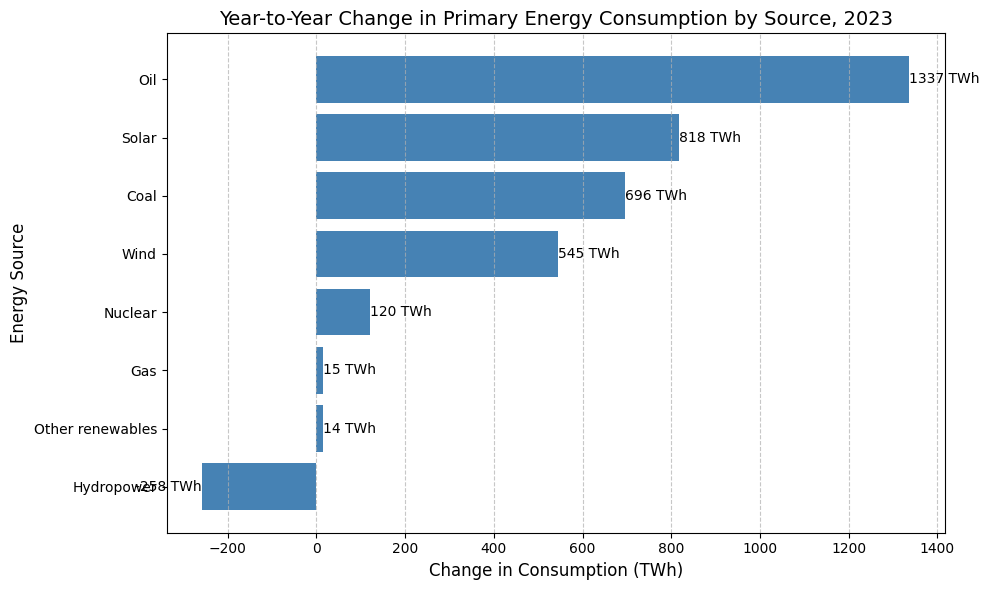

In [25]:
# Plot the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(df_change["Source"], df_change["Change (TWh)"], color="steelblue")

# Add labels and title
plt.title("Year-to-Year Change in Primary Energy Consumption by Source, 2023", fontsize=14)
plt.xlabel("Change in Consumption (TWh)", fontsize=12)
plt.ylabel("Energy Source", fontsize=12)

# Add values to the bars
for index, value in enumerate(df_change["Change (TWh)"]):
    plt.text(value, index, f"{value} TWh", va="center", ha="left" if value > 0 else "right", color="black")

plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


In [29]:
# Filter data for Germany
df_germany = df[df['country'] == 'Germany']

# Select relevant energy columns and calculate year-to-year changes
energy_sources = [
    'oil_consumption', 'solar_consumption', 'coal_consumption', 
    'wind_consumption', 'nuclear_consumption', 'gas_consumption', 
    'biofuel_consumption', 'hydro_consumption'
]

df_germany_changes = df_germany[['year'] + energy_sources].copy()

# Calculate the year-over-year change for each energy source
for source in energy_sources:
    df_germany_changes[source] = df_germany_changes[source].diff()

# Filter for 2023
df_germany_2023 = df_germany_changes[df_germany_changes['year'] == 2023]


In [31]:
data_germany = {
    "Source": [
        "Oil", "Solar", "Coal", "Wind", "Nuclear", "Gas", "Biofuel", "Hydropower"
    ],
    "Change (TWh)": [
        df_germany_2023['oil_consumption'].values[0],
        df_germany_2023['solar_consumption'].values[0],
        df_germany_2023['coal_consumption'].values[0],
        df_germany_2023['wind_consumption'].values[0],
        df_germany_2023['nuclear_consumption'].values[0],
        df_germany_2023['gas_consumption'].values[0],
        df_germany_2023['biofuel_consumption'].values[0],
        df_germany_2023['hydro_consumption'].values[0]
    ]
}

df_change_germany = pd.DataFrame(data_germany).sort_values(by="Change (TWh)", ascending=True)


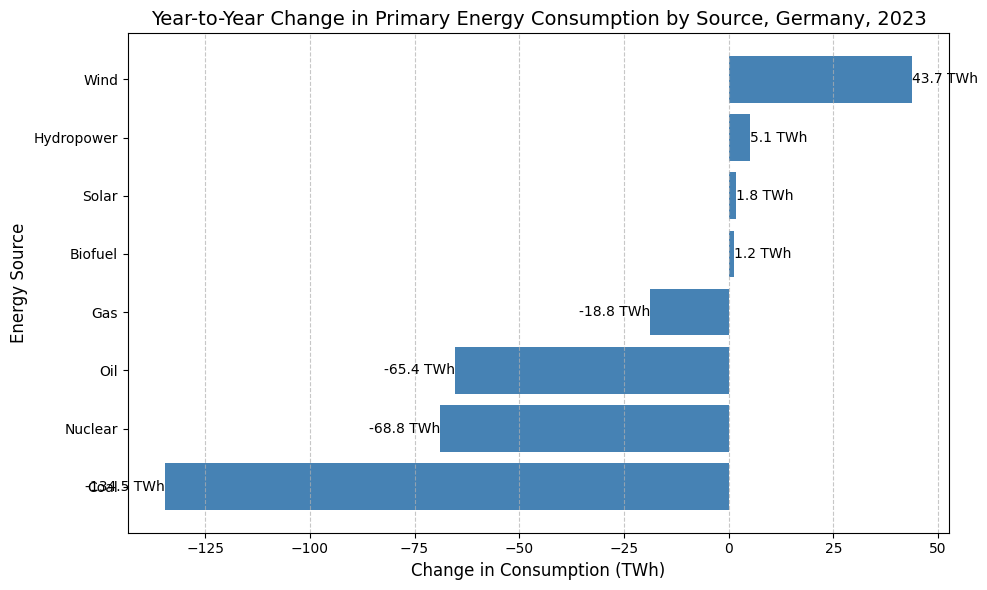

In [32]:
# Plot the horizontal bar chart for Germany
plt.figure(figsize=(10, 6))
plt.barh(df_change_germany["Source"], df_change_germany["Change (TWh)"], color="steelblue")

# Add labels and title
plt.title("Year-to-Year Change in Primary Energy Consumption by Source, Germany, 2023", fontsize=14)
plt.xlabel("Change in Consumption (TWh)", fontsize=12)
plt.ylabel("Energy Source", fontsize=12)

# Add values to the bars
for index, value in enumerate(df_change_germany["Change (TWh)"]):
    plt.text(value, index, f"{value:.1f} TWh", va="center", ha="left" if value > 0 else "right", color="black")

plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


In [33]:
# Select relevant columns for Germany
energy_sources = [
    'oil_consumption', 'solar_consumption', 'coal_consumption',
    'wind_consumption', 'nuclear_consumption', 'gas_consumption',
    'biofuel_consumption', 'hydro_consumption'
]

# Filter Germany data and calculate year-to-year changes
df_germany = df[df['country'] == 'Germany'][['year'] + energy_sources].copy()
for source in energy_sources:
    df_germany[source] = df_germany[source].diff()

# Filter for 2023
df_germany_2023 = df_germany[df_germany['year'] == 2023]

# Prepare Germany data for plotting
data_germany = {
    "Source": [
        "Oil", "Solar", "Coal", "Wind", "Nuclear", "Gas", "Biofuel", "Hydropower"
    ],
    "Change (TWh)": [
        df_germany_2023['oil_consumption'].values[0],
        df_germany_2023['solar_consumption'].values[0],
        df_germany_2023['coal_consumption'].values[0],
        df_germany_2023['wind_consumption'].values[0],
        df_germany_2023['nuclear_consumption'].values[0],
        df_germany_2023['gas_consumption'].values[0],
        df_germany_2023['biofuel_consumption'].values[0],
        df_germany_2023['hydro_consumption'].values[0]
    ]
}

df_change_germany = pd.DataFrame(data_germany)


In [34]:
data_global = {
    "Source": [
        "Oil", "Solar", "Coal", "Wind", "Nuclear", "Gas", "Other renewables", "Hydropower"
    ],
    "Change (TWh)": [1337, 818, 696, 545, 120, 15, 14, -258]
}

df_change_global = pd.DataFrame(data_global)


In [35]:
# Merge Germany and global data for comparison
df_comparison = pd.merge(
    df_change_global, df_change_germany,
    on="Source", suffixes=("_Global", "_Germany")
)

print(df_comparison)


       Source  Change (TWh)_Global  Change (TWh)_Germany
0         Oil                 1337               -65.377
1       Solar                  818                 1.797
2        Coal                  696              -134.538
3        Wind                  545                43.724
4     Nuclear                  120               -68.848
5         Gas                   15               -18.809
6  Hydropower                 -258                 5.066


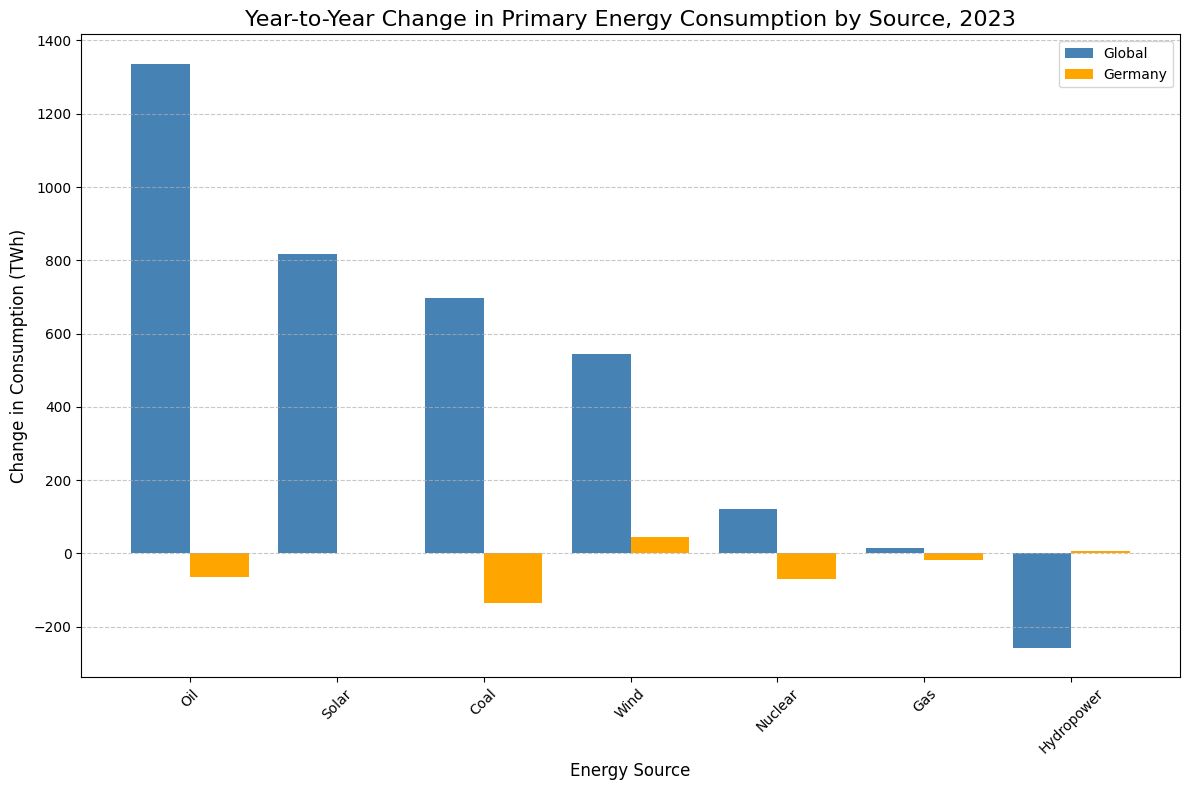

In [36]:
import numpy as np

# Set up bar positions
x = np.arange(len(df_comparison['Source']))  # Positions for each source
width = 0.4  # Width of the bars

# Plot
plt.figure(figsize=(12, 8))
plt.bar(x - width/2, df_comparison['Change (TWh)_Global'], width, label='Global', color='steelblue')
plt.bar(x + width/2, df_comparison['Change (TWh)_Germany'], width, label='Germany', color='orange')

# Add labels, title, and legend
plt.title("Year-to-Year Change in Primary Energy Consumption by Source, 2023", fontsize=16)
plt.xlabel("Energy Source", fontsize=12)
plt.ylabel("Change in Consumption (TWh)", fontsize=12)
plt.xticks(x, df_comparison['Source'], rotation=45)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


/tmp/ipykernel_31/287588366.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['energy_per_person'] = (


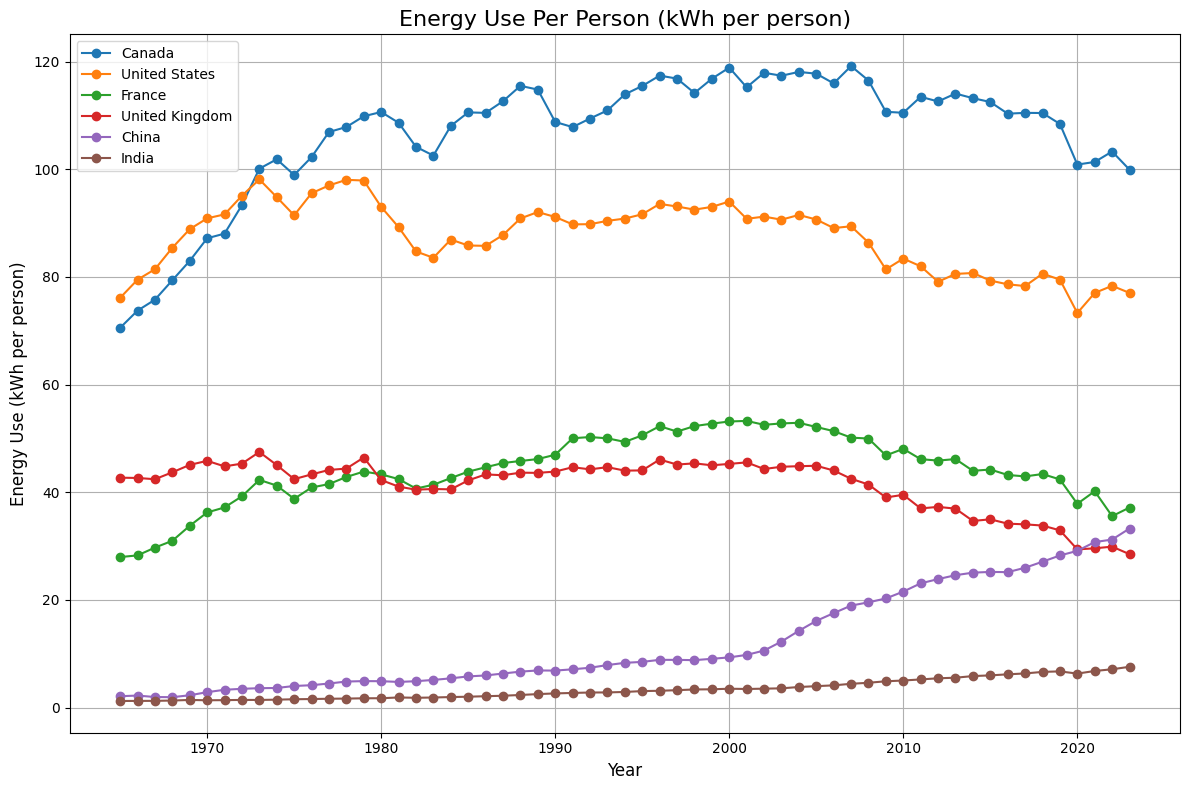

In [38]:

# Filter for the relevant countries
countries = ['Canada', 'United States', 'France', 'United Kingdom', 'China', 'India']
df_filtered = df[df['country'].isin(countries)]

# Calculate energy use per person
df_filtered['energy_per_person'] = (
    df_filtered['primary_energy_consumption'] * 1e6 / df_filtered['population']
)

# Plot energy use per person over time for each country
plt.figure(figsize=(12, 8))
for country in countries:
    country_data = df_filtered[df_filtered['country'] == country]
    plt.plot(
        country_data['year'], 
        country_data['energy_per_person'], 
        label=country, 
        marker='o'
    )

# Add labels, title, and legend
plt.title('Energy Use Per Person (kWh per person)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Energy Use (kWh per person)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipykernel_31/2889184128.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_germany['energy_per_person'] = (


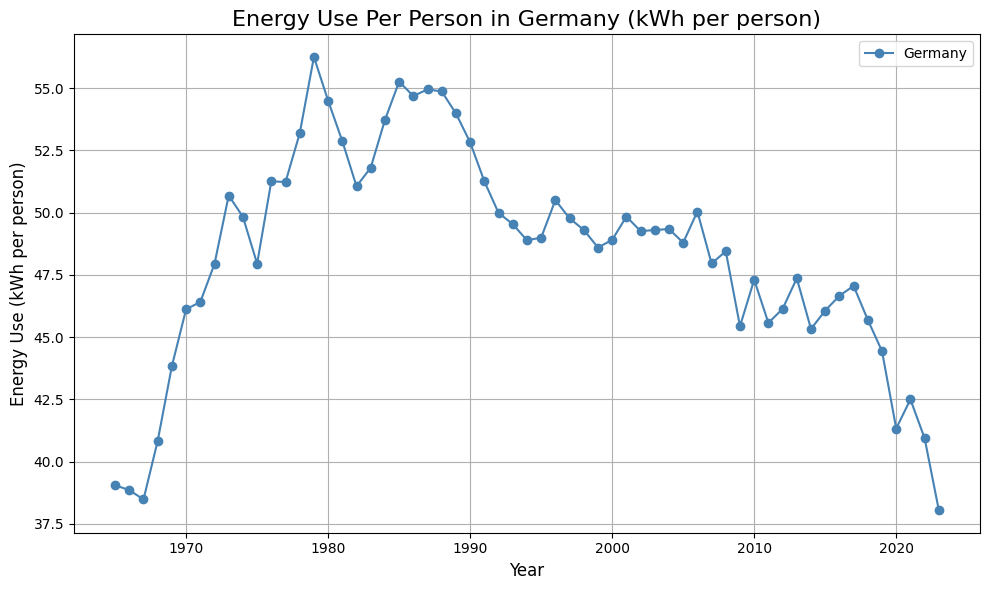

In [39]:
# Filter for Germany
df_germany = df[df['country'] == 'Germany']

# Calculate energy use per person
df_germany['energy_per_person'] = (
    df_germany['primary_energy_consumption'] * 1e6 / df_germany['population']
)

# Plot energy use per person over time
plt.figure(figsize=(10, 6))
plt.plot(
    df_germany['year'], 
    df_germany['energy_per_person'], 
    marker='o', 
    color='steelblue', 
    label='Germany'
)

# Add labels, title, and legend
plt.title('Energy Use Per Person in Germany (kWh per person)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Energy Use (kWh per person)', fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [41]:
total_columns = df_germany.shape[1]
column_names = df_germany.columns.tolist()

print(f"\nTotal columns: {total_columns}")
print("Column names:")
print(column_names)


Total columns: 131
Column names:
['country', 'year', 'iso_code', 'population', 'gdp', 'biofuel_cons_change_pct', 'biofuel_cons_change_twh', 'biofuel_cons_per_capita', 'biofuel_consumption', 'biofuel_elec_per_capita', 'biofuel_electricity', 'biofuel_share_elec', 'biofuel_share_energy', 'carbon_intensity_elec', 'coal_cons_change_pct', 'coal_cons_change_twh', 'coal_cons_per_capita', 'coal_consumption', 'coal_elec_per_capita', 'coal_electricity', 'coal_prod_change_pct', 'coal_prod_change_twh', 'coal_prod_per_capita', 'coal_production', 'coal_share_elec', 'coal_share_energy', 'electricity_demand', 'electricity_demand_per_capita', 'electricity_generation', 'electricity_share_energy', 'energy_cons_change_pct', 'energy_cons_change_twh', 'energy_per_capita', 'energy_per_gdp', 'fossil_cons_change_pct', 'fossil_cons_change_twh', 'fossil_elec_per_capita', 'fossil_electricity', 'fossil_energy_per_capita', 'fossil_fuel_consumption', 'fossil_share_elec', 'fossil_share_energy', 'gas_cons_change_pct',

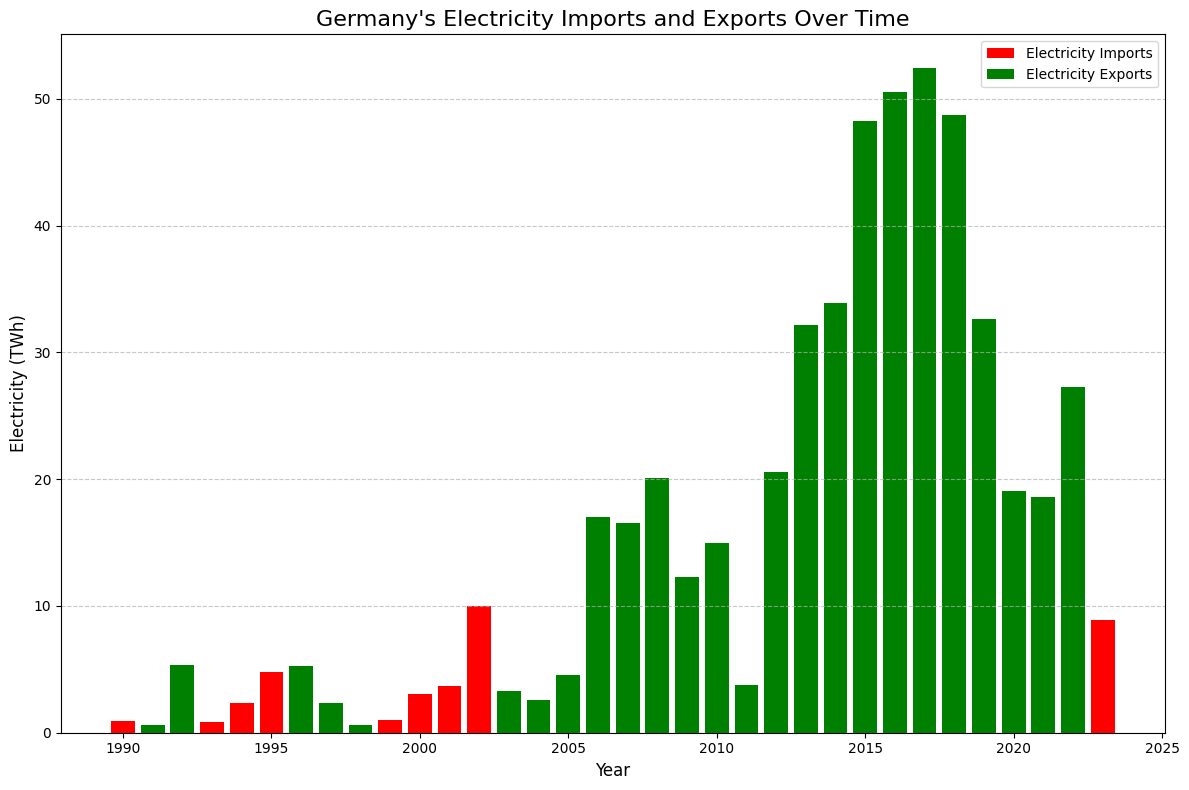

In [42]:
# Ensure relevant columns are available in the dataset
relevant_columns = ['year', 'net_elec_imports', 'electricity_generation', 'electricity_demand']
if not all(col in df_germany.columns for col in relevant_columns):
    print("The required columns are not available in the dataset.")
else:
    # Create a DataFrame with relevant data
    df_germany_electricity = df_germany[relevant_columns].copy()

    # Calculate electricity imports and exports
    df_germany_electricity['electricity_imports'] = df_germany_electricity['net_elec_imports'].clip(lower=0)
    df_germany_electricity['electricity_exports'] = -df_germany_electricity['net_elec_imports'].clip(upper=0)

    # Plot stacked bar chart for imports and exports
    plt.figure(figsize=(12, 8))
    plt.bar(
        df_germany_electricity['year'], 
        df_germany_electricity['electricity_imports'], 
        label='Electricity Imports', color='red'
    )
    plt.bar(
        df_germany_electricity['year'], 
        df_germany_electricity['electricity_exports'], 
        label='Electricity Exports', color='green', bottom=df_germany_electricity['electricity_imports']
    )

    # Add labels and title
    plt.title("Germany's Electricity Imports and Exports Over Time", fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Electricity (TWh)', fontsize=12)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


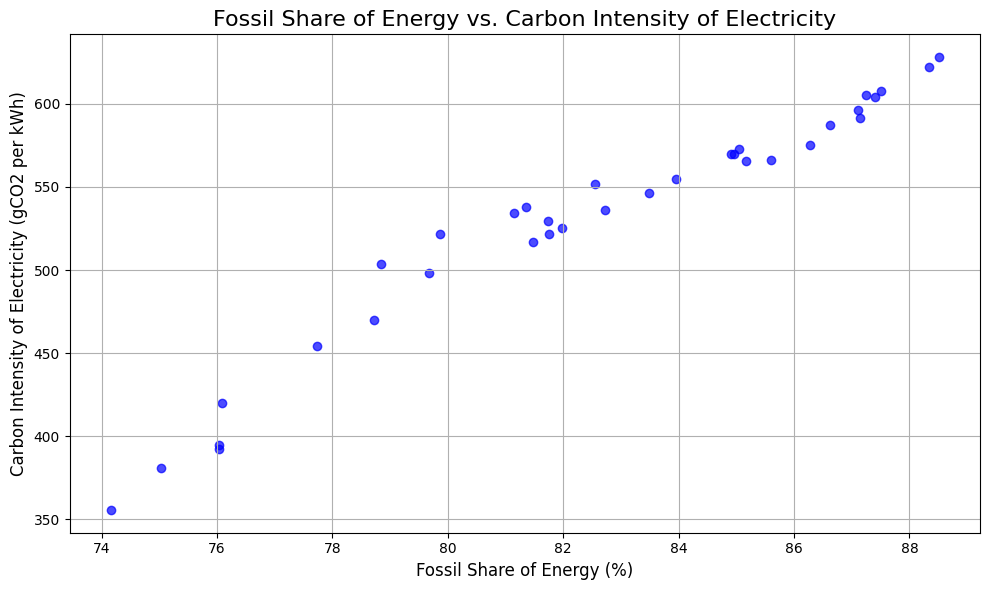

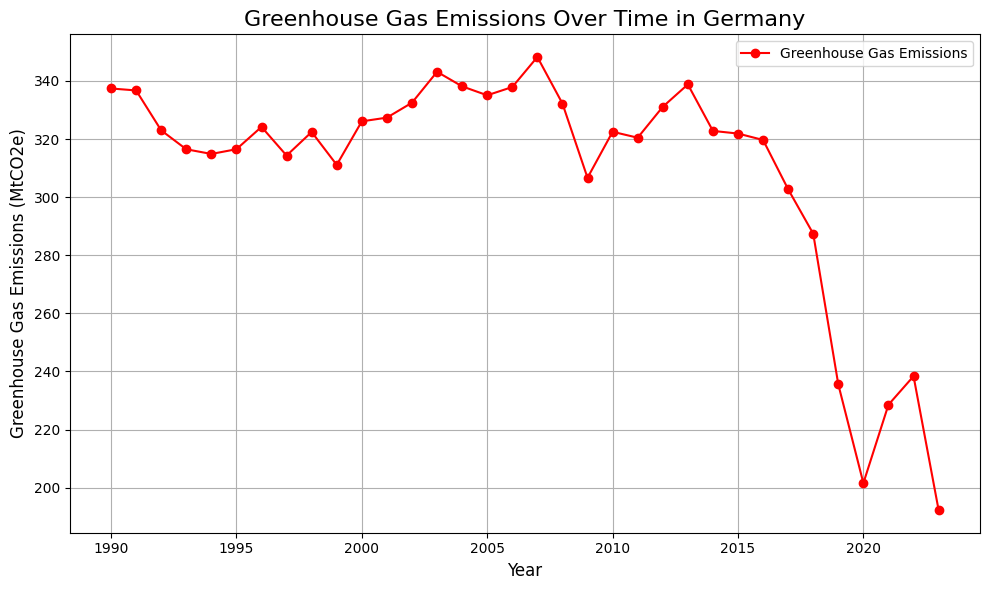

In [43]:
# Ensure relevant columns are available in the dataset
relevant_columns = ['year', 'carbon_intensity_elec', 'greenhouse_gas_emissions', 'fossil_share_energy']
if not all(col in df_germany.columns for col in relevant_columns):
    print("The required columns are not available in the dataset.")
else:
    # Create a DataFrame with relevant data
    df_germany_carbon = df_germany[relevant_columns].dropna()

    # Scatter plot: fossil_share_energy vs. carbon_intensity_elec
    plt.figure(figsize=(10, 6))
    plt.scatter(
        df_germany_carbon['fossil_share_energy'], 
        df_germany_carbon['carbon_intensity_elec'], 
        color='blue', alpha=0.7
    )
    plt.title('Fossil Share of Energy vs. Carbon Intensity of Electricity', fontsize=16)
    plt.xlabel('Fossil Share of Energy (%)', fontsize=12)
    plt.ylabel('Carbon Intensity of Electricity (gCO2 per kWh)', fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Line chart: greenhouse_gas_emissions over time
    plt.figure(figsize=(10, 6))
    plt.plot(
        df_germany_carbon['year'], 
        df_germany_carbon['greenhouse_gas_emissions'], 
        marker='o', color='red', label='Greenhouse Gas Emissions'
    )
    plt.title('Greenhouse Gas Emissions Over Time in Germany', fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Greenhouse Gas Emissions (MtCO2e)', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

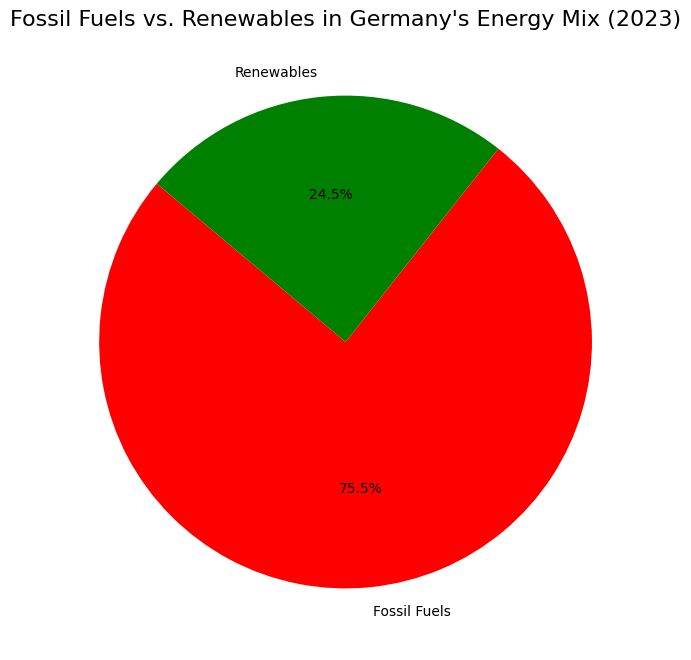

In [44]:
# Ensure relevant columns are available in the dataset
relevant_columns = ['year', 'fossil_fuel_consumption', 'fossil_share_energy', 'fossil_electricity', 'renewables_share_energy']
if not all(col in df_germany.columns for col in relevant_columns):
    print("The required columns are not available in the dataset.")
else:
    # Create a DataFrame with relevant data
    df_germany_fossil = df_germany[relevant_columns].dropna()

    # Visualization 1: Pie chart for fossil fuel vs. renewables for the latest year
    latest_year = df_germany_fossil['year'].max()
    latest_data = df_germany_fossil[df_germany_fossil['year'] == latest_year].iloc[0]
    fossil_share = latest_data['fossil_share_energy']
    renewables_share = latest_data['renewables_share_energy']

    plt.figure(figsize=(8, 8))
    plt.pie(
        [fossil_share, renewables_share], 
        labels=['Fossil Fuels', 'Renewables'], 
        autopct='%1.1f%%', 
        colors=['red', 'green'], 
        startangle=140
    )
    plt.title(f"Fossil Fuels vs. Renewables in Germany's Energy Mix ({latest_year})", fontsize=16)
    plt.show()


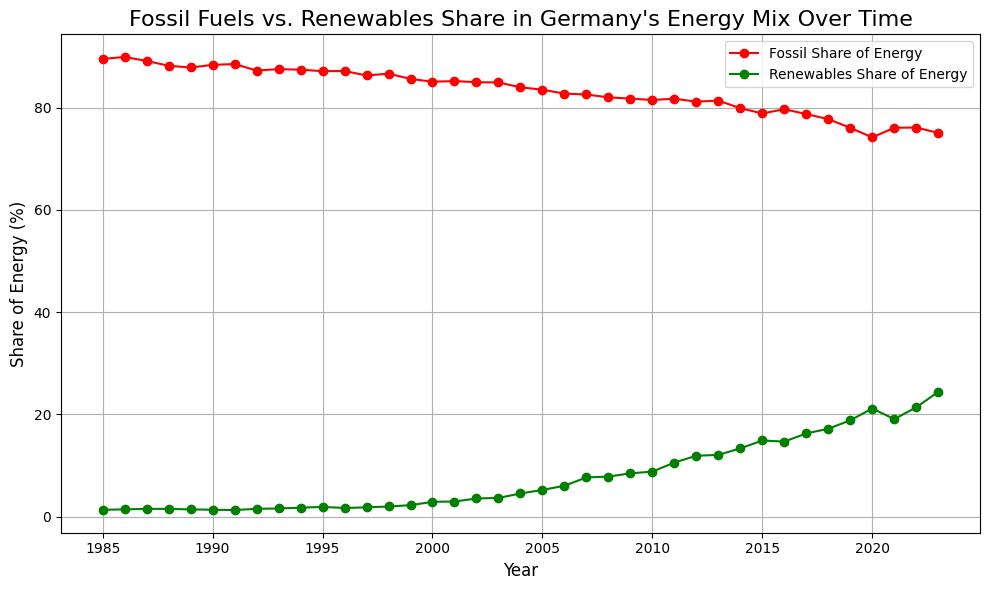

In [45]:
    # Visualization 2: Line chart showing the trend over time
    plt.figure(figsize=(10, 6))
    plt.plot(
        df_germany_fossil['year'], 
        df_germany_fossil['fossil_share_energy'], 
        label='Fossil Share of Energy', marker='o', color='red'
    )
    plt.plot(
        df_germany_fossil['year'], 
        df_germany_fossil['renewables_share_energy'], 
        label='Renewables Share of Energy', marker='o', color='green'
    )
    plt.title("Fossil Fuels vs. Renewables Share in Germany's Energy Mix Over Time", fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Share of Energy (%)', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


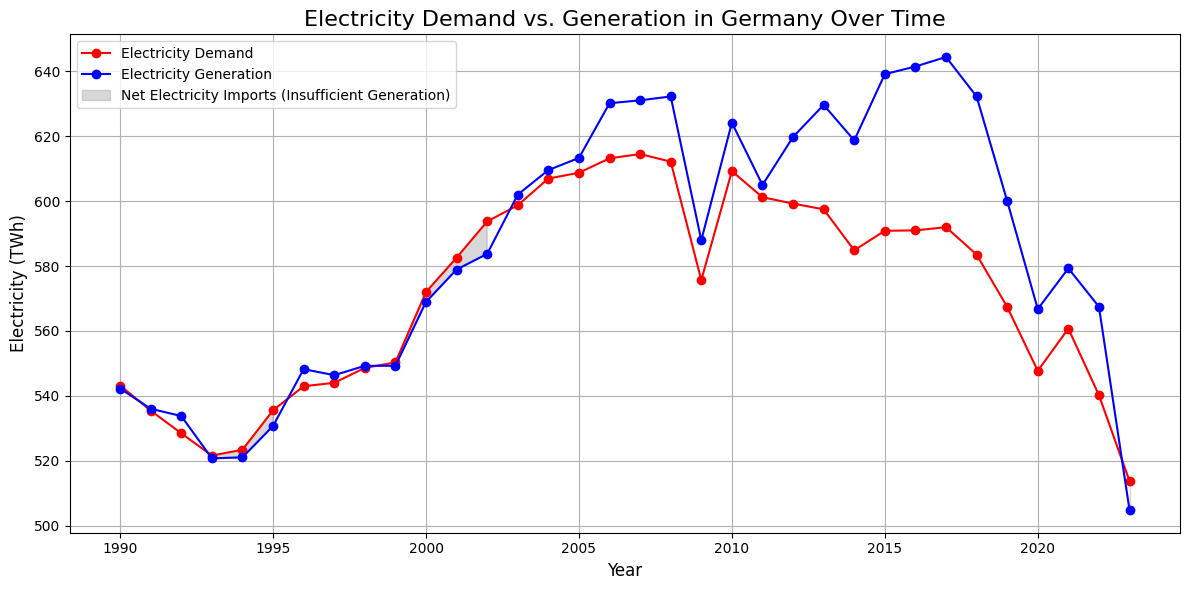

In [46]:
# Ensure relevant columns are available in the dataset
relevant_columns = ['year', 'electricity_demand', 'electricity_generation', 'net_elec_imports']
if not all(col in df_germany.columns for col in relevant_columns):
    print("The required columns are not available in the dataset.")
else:
    # Create a DataFrame with relevant data
    df_germany_electricity = df_germany[relevant_columns].dropna()

    # Visualization: Line chart showing electricity demand vs. generation
    plt.figure(figsize=(12, 6))
    plt.plot(
        df_germany_electricity['year'], 
        df_germany_electricity['electricity_demand'], 
        label='Electricity Demand', marker='o', color='red'
    )
    plt.plot(
        df_germany_electricity['year'], 
        df_germany_electricity['electricity_generation'], 
        label='Electricity Generation', marker='o', color='blue'
    )

    # Highlight net electricity imports as a secondary indicator
    plt.fill_between(
        df_germany_electricity['year'], 
        df_germany_electricity['electricity_generation'], 
        df_germany_electricity['electricity_demand'], 
        where=(df_germany_electricity['electricity_demand'] > df_germany_electricity['electricity_generation']),
        color='gray', alpha=0.3, label='Net Electricity Imports (Insufficient Generation)'
    )

    # Add labels, title, and legend
    plt.title("Electricity Demand vs. Generation in Germany Over Time", fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Electricity (TWh)', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


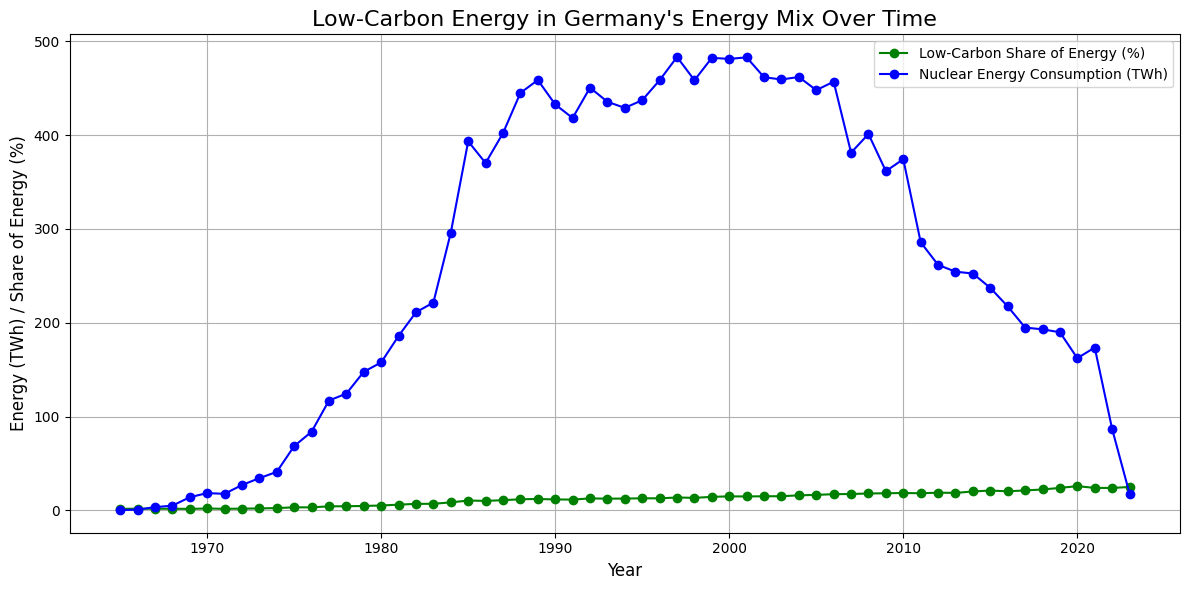

In [47]:
# Ensure relevant columns are available in the dataset
relevant_columns = ['year', 'low_carbon_consumption', 'low_carbon_share_energy', 'nuclear_consumption']
if not all(col in df_germany.columns for col in relevant_columns):
    print("The required columns are not available in the dataset.")
else:
    # Create a DataFrame with relevant data
    df_germany_low_carbon = df_germany[relevant_columns].dropna()

    # Visualization: Line chart showing low_carbon_share_energy over time
    plt.figure(figsize=(12, 6))
    plt.plot(
        df_germany_low_carbon['year'], 
        df_germany_low_carbon['low_carbon_share_energy'], 
        label='Low-Carbon Share of Energy (%)', marker='o', color='green'
    )
    plt.plot(
        df_germany_low_carbon['year'], 
        df_germany_low_carbon['nuclear_consumption'], 
        label='Nuclear Energy Consumption (TWh)', marker='o', color='blue'
    )
    plt.title("Low-Carbon Energy in Germany's Energy Mix Over Time", fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Energy (TWh) / Share of Energy (%)', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


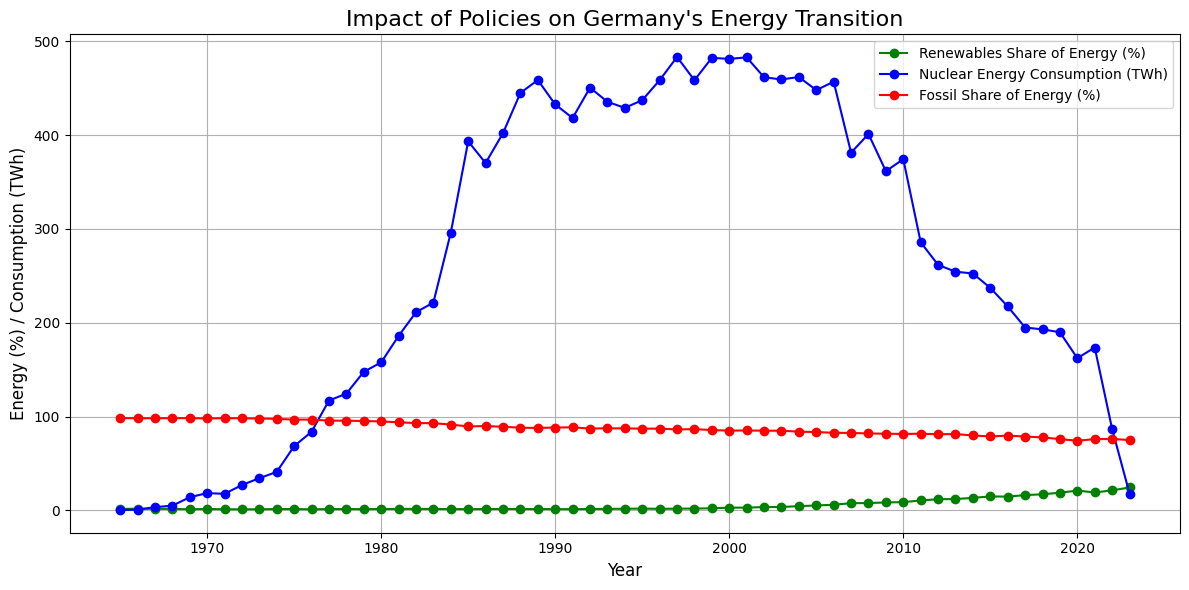

In [48]:
# Ensure relevant columns are available in the dataset
relevant_columns = ['year', 'renewables_share_energy', 'nuclear_consumption', 'fossil_share_energy']
if not all(col in df_germany.columns for col in relevant_columns):
    print("The required columns are not available in the dataset.")
else:
    # Create a DataFrame with relevant data
    df_germany_transition = df_germany[relevant_columns].dropna()

    # Visualization: Multi-line chart showing energy transition
    plt.figure(figsize=(12, 6))
    plt.plot(
        df_germany_transition['year'], 
        df_germany_transition['renewables_share_energy'], 
        label='Renewables Share of Energy (%)', marker='o', color='green'
    )
    plt.plot(
        df_germany_transition['year'], 
        df_germany_transition['nuclear_consumption'], 
        label='Nuclear Energy Consumption (TWh)', marker='o', color='blue'
    )
    plt.plot(
        df_germany_transition['year'], 
        df_germany_transition['fossil_share_energy'], 
        label='Fossil Share of Energy (%)', marker='o', color='red'
    )
    plt.title("Impact of Policies on Germany's Energy Transition", fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Energy (%) / Consumption (TWh)', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


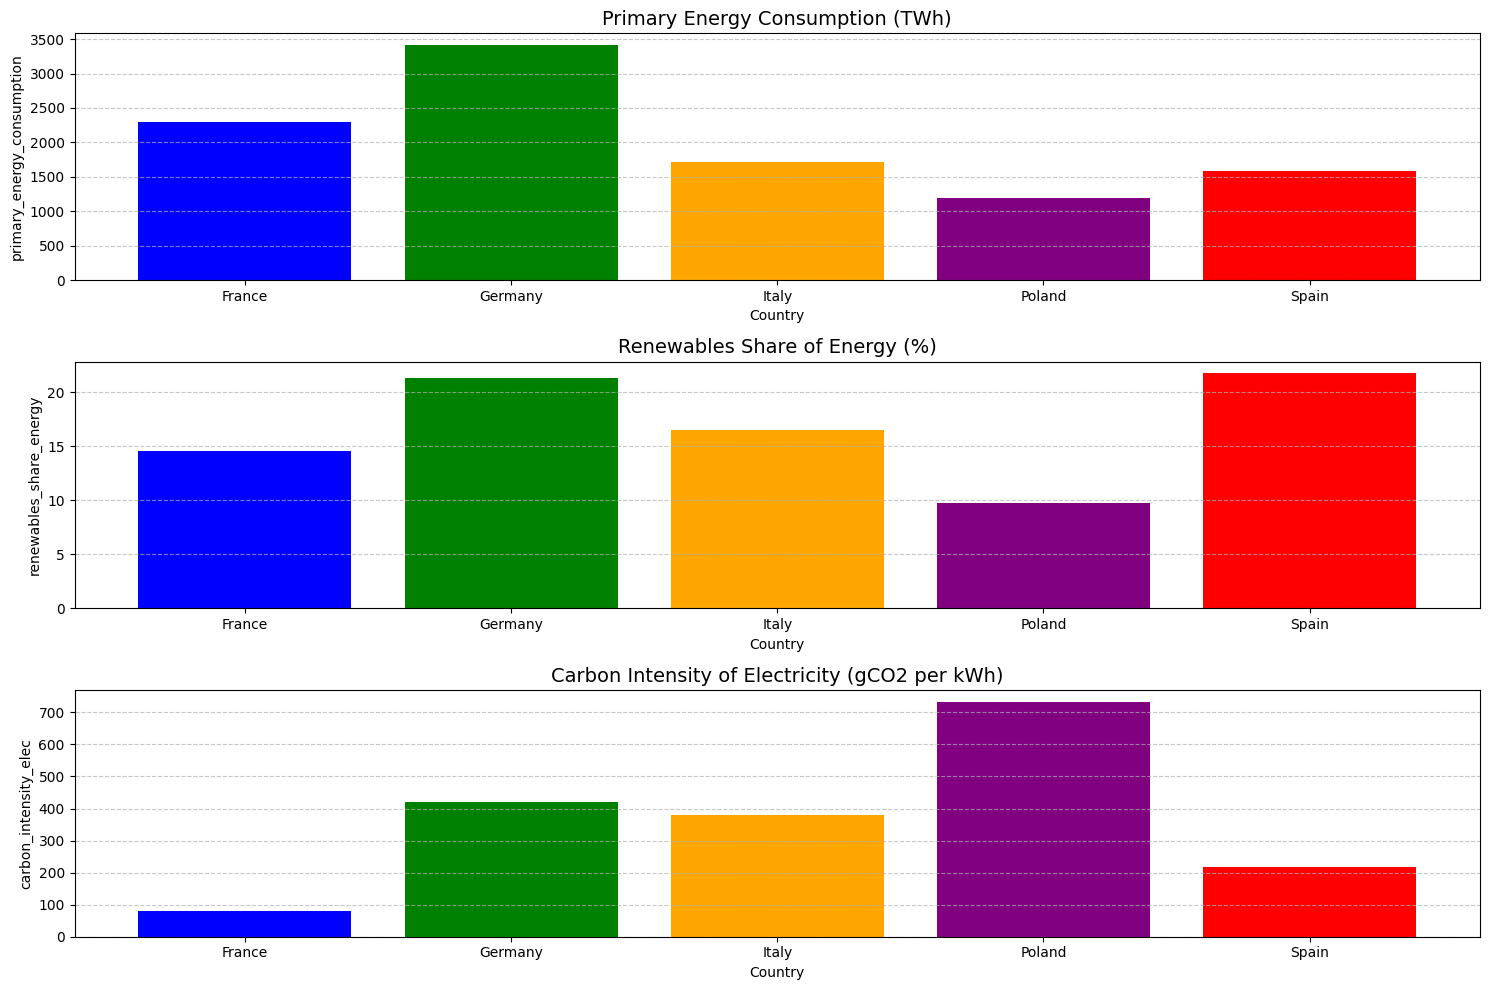

In [49]:
# Ensure relevant columns are available in the dataset
relevant_columns = ['country', 'year', 'primary_energy_consumption', 'renewables_share_energy', 'carbon_intensity_elec']
if not all(col in df.columns for col in relevant_columns):
    print("The required columns are not available in the dataset.")
else:
    # Filter data for selected EU countries and a specific year
    selected_countries = ['Germany', 'France', 'Italy', 'Spain', 'Poland']
    specific_year = 2022
    df_eu_comparison = df[(df['country'].isin(selected_countries)) & (df['year'] == specific_year)]

    # Check if data is available for the selected year
    if df_eu_comparison.empty:
        print(f"No data available for the year {specific_year} for the selected countries.")
    else:
        # Visualization: Bar charts for the comparisons
        metrics = ['primary_energy_consumption', 'renewables_share_energy', 'carbon_intensity_elec']
        titles = [
            'Primary Energy Consumption (TWh)',
            'Renewables Share of Energy (%)',
            'Carbon Intensity of Electricity (gCO2 per kWh)'
        ]

        # Create subplots for the metrics
        plt.figure(figsize=(15, 10))
        for i, metric in enumerate(metrics):
            plt.subplot(3, 1, i + 1)
            plt.bar(df_eu_comparison['country'], df_eu_comparison[metric], 
                    color=['blue', 'green', 'orange', 'purple', 'red'])
            plt.title(titles[i], fontsize=14)
            plt.ylabel(metric)
            plt.xlabel('Country')
            plt.grid(axis='y', linestyle='--', alpha=0.7)

        plt.tight_layout()
        plt.show()


In [52]:
import plotly.express as px
# Filter for the latest year and necessary columns
latest_year = 2022
df_global = df[df['year'] == latest_year][['country', 'iso_code', 'renewables_share_energy']].dropna()

# Create an interactive choropleth map
fig = px.choropleth(
    df_global,
    locations="iso_code",  # ISO country codes for mapping
    color="renewables_share_energy",  # Metric to color by
    hover_name="country",  # Display country name on hover
    color_continuous_scale="Greens",  # Color scale
    title=f"Renewables Share of Energy by Country ({latest_year})"
)

# Customize the map appearance
fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='natural earth'
    ),
    coloraxis_colorbar=dict(
        title="Renewables Share (%)"
    )
)

# Show the map
fig.show()

In [56]:
import folium
from geopy.geocoders import Nominatim
latest_year = 2022
df_global = df[df['year'] == latest_year][['country', 'renewables_share_energy']].dropna()

# Add latitude and longitude using geopy
geolocator = Nominatim(user_agent="geoapiExercises")

def get_coordinates(country):
    try:
        location = geolocator.geocode(country)
        if location:
            return location.latitude, location.longitude
        else:
            return None, None
    except:
        return None, None

df_global[['latitude', 'longitude']] = df_global['country'].apply(
    lambda x: pd.Series(get_coordinates(x))
)

# Filter out rows where latitude or longitude is missing
df_global = df_global.dropna(subset=['latitude', 'longitude'])

# Create a folium map
m = folium.Map(location=[20, 0], zoom_start=2)

# Add data points for renewables
for _, row in df_global.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color='green',
        fill=True,
        fill_color='green',
        fill_opacity=0.7,
        tooltip=f"{row['country']}: {row['renewables_share_energy']}%"
    ).add_to(m)

# Save the map to Kaggle's working directory
map_path = '/kaggle/working/renewables_map.html'
m.save(map_path)
print(f"Map saved to {map_path}")

Map saved to /kaggle/working/renewables_map.html
